Welcome back, folks! This post is the last in the series of NumPy exercises. In this post, we will see intermediate and advanced level exercises. Remember, the more you practice, the more you will understand NumPy and will use it with ease in your ML projects.

Let's now start by importing the NumPy as usual.

In [2]:
import numpy as np

### Ex 41: Convert a numeric to a categorical (text) array

Q: Bin the petal length (3rd) column of the_data_2d to form a text array, such that if petal length is:

   * Less than 3 we change it to 'small.'
   * between 3 and 5 we change it to 'medium.'
   * Greater or equal to 5 we change it to 'large.'
   
Finally, print the first four values.

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
the_data_2d = np.genfromtxt(url, delimiter=',', dtype='object')

#### Desire output

In [36]:
#['small', 'small', 'small', 'small']

#### Solution

In [34]:
petal_length_bins = np.digitize(the_data_2d[:,2].astype("float"),[0,3,5,10])
label_map = {1: 'small', 2: 'medium', 3: 'large', 4: np.nan}
petal_lenght_categorized = [label_map[x] for x in petal_lenght_bins]

In [37]:
petal_lenght_categorized[:5]

['small', 'small', 'small', 'small']

We start by selecting the sepal length column and cast it to float. Then we use the digitize method to create bins or, as I like to call them, containers for the corresponding range of values in the column. 

So we are assigning the following values:
* 1 to all the elements between 0 and 3 exclusive (3 not included) in the petal length column. 
* 2 to all the elements between 3 and 5 exclusive.
* Finally, 3 to all the elements between 5 to 10 exclusive.

We then now create a dictionary with key-value pairs where each key has a corresponding text. 1 is associated with small, 2 is associated with medium, and finally, 3 is associated with large.

Finally, we use list comprehension to go through the bins and replace each instance of 1, 2, and 3 by the corresponding text and print the first four elements.

### Ex 42: Create a new column from existing columns of a NumPy array

Q: Create a new column for volume in the_data_2d, where volume is (pi x petal length(3rd column) x sepal length(1st column)^2)/3

In [135]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
the_data_2d = np.loadtxt(url, delimiter=',', dtype=float,usecols=[0,1,2,3])

#### Desire output

In [136]:
# array([[ 5.1       ,  3.5       ,  1.4       ,  0.2       , 38.13265163],
#        [ 4.9       ,  3.        ,  1.4       ,  0.2       , 35.20049849],
#        [ 4.7       ,  3.2       ,  1.3       ,  0.2       , 30.07237208],
#        [ 4.6       ,  3.1       ,  1.5       ,  0.2       , 33.23805027],
#        [ 5.        ,  3.6       ,  1.4       ,  0.2       , 36.65191429]])

#### Solution

In [137]:
volume = (np.pi * the_data_2d[:,2] * pow(the_data_2d[:,0],2))/3

In [138]:
volume

array([ 38.13,  35.2 ,  30.07,  33.24,  36.65,  51.91,  31.02,  39.27,
        28.38,  37.71,  45.8 ,  38.6 ,  33.78,  21.3 ,  42.27,  51.04,
        39.7 ,  38.13,  57.84,  40.86,  51.91,  40.86,  22.16,  46.3 ,
        45.84,  41.89,  41.89,  42.47,  39.64,  37.01,  38.6 ,  45.8 ,
        42.47,  44.35,  37.71,  31.42,  41.18,  37.71,  26.36,  40.86,
        34.03,  27.57,  26.36,  41.89,  51.75,  33.78,  43.58,  31.02,
        44.12,  36.65, 241.17, 193.02, 244.3 , 126.71, 203.52, 153.11,
       195.35,  82.97, 209.83, 110.43,  91.63, 153.1 , 150.8 , 183.14,
       118.22, 206.84, 147.78, 144.43, 181.14, 128.08, 174.97, 155.86,
       203.66, 183.14, 184.44, 200.71, 232.43, 235.04, 169.65, 119.08,
       120.38, 117.21, 137.39, 192.27, 137.41, 169.65, 220.94, 182.88,
       134.64, 126.71, 139.38, 179.24, 140.91,  86.39, 137.93, 142.9 ,
       142.9 , 173.09,  81.71, 139.5 , 249.38, 179.66, 311.46, 232.75,
       256.62, 399.21, 113.14, 351.57, 272.65, 331.15, 225.64, 227.33,
      

We first get the volume by multiplying the pie constant with the third column times the power by two of the first column then finally dividing the whole by 3.

But there is an issue; the volume is a one-dimensional array, while the_data_2d is a two-dimensional array. It means that we can not stack them together because they are of different dimensions. We have to change the dimension of volume to a two-dimensional array.

In [142]:
volume.shape

(150,)

In [143]:
volume = volume[:,np.newaxis]

We use the newaxis method, which will increase a dimension to the next dimension. In our case, because we had a one-dimensional array, we would have a two-dimensional array.

In [144]:
volume.shape

(150, 1)

In [136]:
the_data_2d.shape

(150, 4)

Now we can append the volume to the the_data_2d array. There are two ways of achieving this.

#### 1st Method

In [129]:
np.set_printoptions(suppress=True)
np.append(the_data_2d,volume,axis=1)[:5]

array([[ 5.1       ,  3.5       ,  1.4       ,  0.2       , 38.13265163],
       [ 4.9       ,  3.        ,  1.4       ,  0.2       , 35.20049849],
       [ 4.7       ,  3.2       ,  1.3       ,  0.2       , 30.07237208],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       , 33.23805027],
       [ 5.        ,  3.6       ,  1.4       ,  0.2       , 36.65191429]])

We don't want to print the exponential; we suppress it using the set_printoption method. We append the volume column to the_data_2d column-wise by setting axis to 1 (column-wise or horizontally) and print the first five rows.

#### 2nd Method

In [130]:
np.hstack((the_data_2d,volume))[:5]

array([[ 5.1       ,  3.5       ,  1.4       ,  0.2       , 38.13265163],
       [ 4.9       ,  3.        ,  1.4       ,  0.2       , 35.20049849],
       [ 4.7       ,  3.2       ,  1.3       ,  0.2       , 30.07237208],
       [ 4.6       ,  3.1       ,  1.5       ,  0.2       , 33.23805027],
       [ 5.        ,  3.6       ,  1.4       ,  0.2       , 36.65191429]])

We can also use hstack to stack column-wise the_data_2d and volume and print the first five rows.

### Ex 43: Probabilistic sampling in numpy

Q: Randomly sample iris's species such that setose is twice the number of versicolor and virginica

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
the_data_2d = np.genfromtxt(url, delimiter=',', dtype='object')

#### Desired output

In [5]:
# use np.random.seed(100)
#(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15'), array([77, 37, 36]))

#### Solution

In [6]:
the_data_2d[:,4]
np.random.seed(100)
a = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
species_out = np.random.choice(a,size=150,p=[0.5,0.25,0.25])

We first create an array with the three types of flowers, then use this array to create a random sample with p being the probabilities associated with each entry of size 150. The first entry (Iris-Setosa) has double the probabilities than the two other entries (Iris-versicolor and Iris-virginica). That's why we have set the first element in p to 0.5 and the rest 0.25.

In [7]:
print(np.unique(species_out,return_counts=True))

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15'), array([77, 37, 36]))


We now print out unique values from the species_out and return the count of each value.

### Ex 44: Get the second largest value of an column in an array when grouped by another column?

Q: What is the value of the second-longest petal length of species setosa

In [144]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
the_data_2d = np.genfromtxt(url, delimiter=',', dtype='object')

#### Desire output

In [141]:
# 1.7

#### Solution

In [142]:
petal_lght_set = the_data_2d[the_data_2d[:,4]==b'Iris-setosa',2].astype("float")
print(petal_lght_set)
petal_lght_set_sorted = np.sort(petal_lght_set)
petal_lght_set_sorted_unq = np.unique(petal_lght_set_sorted)
petal_lght_set_sorted_unq[-2]

[1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 1.5 1.6 1.4 1.1 1.2 1.5 1.3 1.4
 1.7 1.5 1.7 1.5 1.  1.7 1.9 1.6 1.6 1.5 1.4 1.6 1.6 1.5 1.5 1.4 1.5 1.2
 1.3 1.5 1.3 1.5 1.3 1.3 1.3 1.6 1.9 1.4 1.6 1.4 1.5 1.4]


1.7

We first select the 5th column (species column) to extract only the iris-setosa species. This expression will return a boolean array, which will be indexed in the original array to get back all the rows where we have the iris-setosa as the species. Now we pass in 2 as the second element in the index to get the petal length column for only the iris-setosa species and cast the array to float.

Then we proceed by sorting and removing duplicates in the column. After getting an ordered list of unique elements, we use indexing to get the second last element by passing in -2 which correspond to the second-longest petal length of setosa.

### Ex 45: How to sort a 2D array by a column

Q: Sort the iris dataset based on the sepal length column.

In [55]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
the_data_2d = np.genfromtxt(url, delimiter=',', dtype='object')

#### Desire output

In [66]:
# array([[b'4.3', b'3.0', b'1.1', b'0.1', b'Iris-setosa'],
#        [b'4.4', b'3.2', b'1.3', b'0.2', b'Iris-setosa'],
#        [b'4.4', b'3.0', b'1.3', b'0.2', b'Iris-setosa'],
#        [b'4.4', b'2.9', b'1.4', b'0.2', b'Iris-setosa'],
#        [b'4.5', b'2.3', b'1.3', b'0.3', b'Iris-setosa'],
#        [b'4.6', b'3.6', b'1.0', b'0.2', b'Iris-setosa'],
#        [b'4.6', b'3.1', b'1.5', b'0.2', b'Iris-setosa'],
#        [b'4.6', b'3.4', b'1.4', b'0.3', b'Iris-setosa'],
#        [b'4.6', b'3.2', b'1.4', b'0.2', b'Iris-setosa'],
#        [b'4.7', b'3.2', b'1.3', b'0.2', b'Iris-setosa']], dtype=object)

#### Solution

In [65]:
the_data_2d[the_data_2d[:,0].astype("float").argsort()][:10]

array([[b'4.3', b'3.0', b'1.1', b'0.1', b'Iris-setosa'],
       [b'4.4', b'3.2', b'1.3', b'0.2', b'Iris-setosa'],
       [b'4.4', b'3.0', b'1.3', b'0.2', b'Iris-setosa'],
       [b'4.4', b'2.9', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.5', b'2.3', b'1.3', b'0.3', b'Iris-setosa'],
       [b'4.6', b'3.6', b'1.0', b'0.2', b'Iris-setosa'],
       [b'4.6', b'3.1', b'1.5', b'0.2', b'Iris-setosa'],
       [b'4.6', b'3.4', b'1.4', b'0.3', b'Iris-setosa'],
       [b'4.6', b'3.2', b'1.4', b'0.2', b'Iris-setosa'],
       [b'4.7', b'3.2', b'1.3', b'0.2', b'Iris-setosa']], dtype=object)

We first select the column we want to sort (in our case the sepal length), cast it to float and use the argsort method to sort and get back the position index of each sorted element. 

Then pass the expression to the original array by using indexing, which will sort the whole array using the sepal length values. Finally, print the first 10 rows.

### Ex 46: How to find the most frequent value in a NumPy column

Q: Find the most frequent value of petal length (3rd column) in the the_data_2d dataset.

In [68]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
the_data_2d = np.genfromtxt(url, delimiter=',', dtype='object')

#### Desired output

In [83]:
#1.5

#### Solution

In [76]:
unique_num, unique_count = np.unique(the_data_2d[:,2].astype("float64"),return_counts=True)

In [82]:
unique_num[np.argmax(unique_count)]

1.5

Here we are using the unique value to get back unique elements (unduplicated elements) and set the total count to True, which will return the counts of how many times an element is duplicated in the column.

With these two variables, we can get the element that was duplicated the most by using the argmax method and give it the argument unique_count and get back the position index of the greatest number. Then we use that position in the unique_num array to get the most reoccurring value.

### Ex 47: Find the position and the first occurrence of a value greater than a given value

Q: Find the position and the exact value of the first occurrence greater than 1.0 in the petal width column (4th column) of the_data_2d dataset.

In [84]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
the_data_2d = np.genfromtxt(url, delimiter=',', dtype='object')

#### Desired output

In [110]:
# The element is 1.4 and is located at position 50 in the petal width column

#### Solution

In [109]:
all_position = np.where(the_data_2d[:,3].astype("float")>1)
larg_num_position = all_position[0][0]

In [105]:
larg_num = the_data_2d[larg_num_position,3]

In [108]:
print("The element is {} and is located at position {} in the petal width column".format(float(larg_num),larg_num_position))

The element is 1.4 and is located at position 50 in the petal width column


We get all the elements in the petal width column and cast them to float, then compare each element to 1 and get back all the positions where the elements are greater than 1 using the numpy where method.

At this stage, we have a 2D array with all the positions of elements higher than 1. To select the first element that corresponds to the first occurrence of a value greater than 1, we use [0] to get the first array within the 2D array and then another [0] right after to get the first element in the nested 1D array.

Now that we managed to get the position of that number, we can get the value itself by using NumPy indexing in the 4th column.

### Ex 48: Replace all values greater than a given value to a given cutoff

Q: From array_a, replace all values greater than 30 to 30 and less than 10 to 10.

In [145]:
np.random.seed(100)
array_a = np.random.uniform(1,50, 20)
array_a

array([27.62684215, 14.64009987, 21.80136195, 42.39403048,  1.23122395,
        6.95688692, 33.86670515, 41.466785  ,  7.69862289, 29.17957314,
       44.67477576, 11.25090398, 10.08108276,  6.31046763, 11.76517714,
       48.95256545, 40.77247431,  9.42510962, 40.99501269, 14.42961361])

#### Desire output

In [146]:
# array([27.62684215, 14.64009987, 21.80136195, 30.        , 10.        ,
#        10.        , 30.        , 30.        , 10.        , 29.17957314,
#        30.        , 11.25090398, 10.08108276, 10.        , 11.76517714,
#        30.        , 30.        , 10.        , 30.        , 14.42961361])

#### Solution

#### 1st Method

In [149]:
np.where(array_a>30,30,np.where(array_a<10,10,array_a))

array([27.62684215, 14.64009987, 21.80136195, 30.        , 10.        ,
       10.        , 30.        , 30.        , 10.        , 29.17957314,
       30.        , 11.25090398, 10.08108276, 10.        , 11.76517714,
       30.        , 30.        , 10.        , 30.        , 14.42961361])

The first way to approach this problem is to use the where method, which takes in as the first argument, the condition we are looking for; in this case, we want to target elements in the array greater than 30. Then, the second argument is the value that will replace each position where the condition is satisfied. It means that all the elements greater than 30 will be replaced by number 30 in the array. 

Finally, the second argument is the value that will be placed in each position where the condition from the first argument is not met. But in our case, we want to change each value less than 10 to 10 that is why we are using another where method to change all the numbers less than 10 to 10 just like we did for 30. The only difference is that this time for the third argument in the nested where method, we pass in the original array, which leaves all the numbers greater than 10 untouched. 

#### 2nd Method

In [150]:
np.clip(array_a,10,30)

array([27.62684215, 14.64009987, 21.80136195, 30.        , 10.        ,
       10.        , 30.        , 30.        , 10.        , 29.17957314,
       30.        , 11.25090398, 10.08108276, 10.        , 11.76517714,
       30.        , 30.        , 10.        , 30.        , 14.42961361])

We can use the clip method, which is easier to understand. We pass in the array itself, and then as a second argument, we place the number 10, which will replace all the numbers less than 10 by 10. The third argument is the maximum number, which will replace all the numbers greater than 30 by 30. That's all!

### Ex 49: How to get the positions of top n values from a NumPy array?

Q: Get the positions of top 5 maximum values in a given array a.

In [152]:
np.random.seed(100)
a = np.random.uniform(1,50, 20)

#### Desire output

In [153]:
#array([18,  7,  3, 10, 15])

#### Solution

In [163]:
np.argsort(a)[-5:]

array([18,  7,  3, 10, 15])

We can use the argsort method, which returns the position from the smallest to the highest elements. To get the position of 5 maximum element, we extract the five last elements using indexing [-5:]

### Ex 50: How to compute the row-wise counts of all possible values in an array

Q: Compute the counts of unique values row-wise.


Instruction: Output contains 10 columns representing numbers from 1 to 10. The values in the solution are the counts of the numbers in the respective rows.

For example, Cell(0,2) in the solution has value 2, which means that the number 3 occurs precisely 2 times in the 1st row. 

Keep in mind that we are generating a random array from 1 to 10, not from 0 to 10. It means that in the output solution, 1 is in the first column, 2 in the second column, and so on.

In [78]:
np.random.seed(100)
arr = np.random.randint(1,11,size=(6, 10))
arr

array([[ 9,  9,  4,  8,  8,  1,  5,  3,  6,  3],
       [ 3,  3,  2,  1,  9,  5,  1, 10,  7,  3],
       [ 5,  2,  6,  4,  5,  5,  4,  8,  2,  2],
       [ 8,  8,  1,  3, 10, 10,  4,  3,  6,  9],
       [ 2,  1,  8,  7,  3,  1,  9,  3,  6,  2],
       [ 9,  2,  6,  5,  3,  9,  4,  6,  1, 10]])

#### Desire output

In [ ]:
# [[1, 0, 2, 1, 1, 1, 0, 2, 2, 0],
#  [2, 1, 3, 0, 1, 0, 1, 0, 1, 1],
#  [0, 3, 0, 2, 3, 1, 0, 1, 0, 0],
#  [1, 0, 2, 1, 0, 1, 0, 2, 1, 2],
#  [2, 2, 2, 0, 0, 1, 1, 1, 1, 0],
#  [1, 1, 1, 1, 1, 2, 0, 0, 2, 1]]

#### Solution

In [136]:
def count_all_repeat(arr):
    uni_count_arr = [np.unique(row,return_counts=True) for row in arr]
    final_array = [[int(counts[uniques==i]) if i in uniques else 0 for i in np.unique(arr)] for uniques, counts in uni_count_arr]
    return final_array
count_all_repeat(arr)

[[1, 0, 2, 1, 1, 1, 0, 2, 2, 0],
 [2, 1, 3, 0, 1, 0, 1, 0, 1, 1],
 [0, 3, 0, 2, 3, 1, 0, 1, 0, 0],
 [1, 0, 2, 1, 0, 1, 0, 2, 1, 2],
 [2, 2, 2, 0, 0, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 2, 0, 0, 2, 1]]

We first create a function and then pass in the array. We search for unique elements and the number of times those elements occur in each row of the array. That is why we are using the list comprehension to go through all the rows to get the uni_count_arr.

The next line is where the magic is happening! We start by going through all the uniques elements and counts from uni_count_arr variable. Then we create a nested list comprehension inside a list comprehension. Inside this list comprehension, we loop through all the unique elements in the array, which will between 1 to 10 and use an if statement to see if a specific number is in the uniques array. 

If it is not found, 0 will be returned, which means that the number is not in the row. If the number is found, we are using indexing on the counts array to get the position where there is a match between uniques value and i value, and cast it to an integer. Finally, we return the multidimensional array.

Note: We could also have used a nested for loop with an if & else statement.

### Ex 51: How to convert an array of arrays into a flat 1d array

Q: Convert array_of_arrays into a flat linear 1d array.

In [185]:
arr1 = np.arange(3)
arr2 = np.arange(3,7)
arr3 = np.arange(7,10)

array_of_arrays = np.array([arr1, arr2, arr3])

#### Desire output

In [186]:
# array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Solution

In [184]:
np.concatenate(array_of_arrays)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

We use the concatenate method to merge all the arrays into one array.

### Ex 52: How to generate one-hot encoding for an array

Q: Compute the one-hot encoding (dummy binary variables for each unique value in the array)

Generating a one-hot encoding is creating a multidimensional array where the number of rows corresponds to the number of elements in the array. 1 will be placed in the position corresponding to the value of the component of the array and 0 will be placed in the remaining positions. for eg, if we have 2 as a value in the original array, the corresponding row will [ 0.,  1.,  0.] where 1 is placed at position 2.

In [139]:
np.random.seed(101) 
arr = np.random.randint(1,4, size=6)
arr

array([2, 3, 2, 2, 2, 1])

#### Desire output

In [141]:
#array([[ 0.,  1.,  0.],
#       [ 0.,  0.,  1.],
#       [ 0.,  1.,  0.],
#       [ 0.,  1.,  0.],
#       [ 0.,  1.,  0.],
#       [ 1.,  0.,  0.]])

#### Solution

In [153]:
def one_hot_encodings(arr):
    the_uniques = np.unique(arr)
    the_out = np.zeros((arr.shape[0],the_uniques.shape[0]))
    for i,element in enumerate(arr):
        the_out[i,element-1] = 1
    return the_out

one_hot_encodings(arr)

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

aWe create first a function that takes in the original array. We get all the uniques elements from the array and create a multidimensional array using the np.zeros method, where the first element in the tuple corresponds to the row which is the numbers of elements in the original array and the second element is the columns corresponding to the uniques array(maximum is 3).

We then create a for loop with the enumerate function, where each element in the array is assigned a number starting from 0. Then we use indexing on the_out variable to traverse all the rows using i value and the element minus 1 as the position of the column; we do subtract one to get the index in the row depending on the value of the element value. For example, for the second row, the corresponding element in the original array is 3, so 3 - 1 gives 2, which is the position to place 1.

After targeting that specific row and column, we are going replacing 0 by 1 to that particular position. After the loop is done, we return the array.

### Ex 53: How to create row numbers grouped by a categorical variable

Q: Create row numbers grouped by a categorical variable. Use the following sample from iris species as input.

In [168]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
species = np.genfromtxt(url, delimiter=',', dtype='str', usecols=4)
np.random.seed(100)
species_sm_sorted = np.sort(np.random.choice(species,size=20))
species_sm_sorted

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica'], dtype='<U15')

#### Desired output

In [169]:
#[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5]

#### Solution

#### 1st Method: using the list comprehension

In [150]:
[i for unique_val in np.unique(species_sm_sorted) for i,_ in enumerate(species_sm_sorted[species_sm_sorted==unique_val])]

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5]

The first way to go about to resolve this is to use a list comprehension. We get all the 3 unique species values and place them in the unique_val. 

We create another for loop with i value as the count from the enumerate function, which will count the number of occurrences of the unique_val variable in species_sm_sorted array starting from 0. For each species, the count is reset.

Finally, we return the i variable in the array.

#### 2nd Method: using the for loop

In [173]:
output = []

for val in np.unique(species_sm_sorted):
    for i,_ in enumerate(species_sm_sorted[species_sm_sorted==val]):
        output.append(i)
print(output)

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5]


We create a for loop to loop through the uniques elements in the array species_sm_sorted which are Iris-setosa, Iris-versicolor, and Iris-virginica.

Then we create a nested for loop with i as the count from the enumerate function, which will count the number of occurrences of the unique_val variable in species_sm_sorted array starting from 0. For each species, the count is reset just as we did with the list comprehension method.

Finally, we return the i variable in the array.

### Ex 54: How to create group ids based on a given categorical variable

Q: Create group ids based on a given categorical variable. Use the following sample from iris species as input.

In [173]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
species = np.genfromtxt(url, delimiter=',', dtype='str', usecols=4)
np.random.seed(100)
species_sm_sorted = np.sort(np.random.choice(species,size=20))
species_sm_sorted

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica'], dtype='<U15')

#### Desired output

In [ ]:
# [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]

#### Solution

#### 1st Method: Using list comprehension

In [163]:
group_id = [np.argwhere(np.unique(species_sm_sorted)==each_unique)[0][0] for each_unique in species_sm_sorted]

In [164]:
group_id

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]

This method is the same as using the for loop method just that, in this case, we are using a list comprehension. Please refer to for loop method for the explanation.

#### 2nd Method: Using for loop 

In [182]:
output = []

for each_unique in species_sm_sorted:
    group_id = np.argwhere(np.unique(species_sm_sorted)==each_unique)[0][0]
    output.append(group_id)
        
print(output)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]


We first loop through each element of species_sm_sorted array. Then we use the np.argwhere method to get the positions where the condition inside the parenthesis is met. The condition is that uniques elements in species_sm_sorted array are equal to each_unique variable. 

We get back the positions where each_unique variables are found as standalone arrays. We use indexing [0][0] to the value inside the 2D array. So that means that Iris-setosa is found 5 times at position 0, then that Iris-versicolor is found 9 times at position 1 and finally that Iris-virginica is found 6 times at position 2.

Finally, we append to the empty list output.

### Ex 55: How to rank items in an array using NumPy

Q: Create the ranks for the given numeric array a.

In [179]:
np.random.seed(10)
arr = np.random.randint(20, size=10)
arr

array([ 9,  4, 15,  0, 17, 16, 17,  8,  9,  0])

#### Desire output

In [180]:
#[4 2 6 0 8 7 9 3 5 1]

#### Solution

In [187]:
arr.argsort().argsort()

array([4, 2, 6, 0, 8, 7, 9, 3, 5, 1])

To get the rank of an array, we apply the argsort method on the array twice. 

The first time we apply the argsort method, we get back an array with the position that would sort the original array. 

Applying the argsort again on the previous array will return an array where those positions are sorted for the second time; to get back the ranks.

### Ex 56: How to rank items in a multidimensional array using NumPy

Q: Create a rank array of the same shape as a given numeric array a.

In [189]:
np.random.seed(10)
arr = np.random.randint(20, size=[2,5])
arr

array([[ 9,  4, 15,  0, 17],
       [16, 17,  8,  9,  0]])

#### Desire output

In [190]:
# array([[4, 2, 6, 0, 8],
#        [7, 9, 3, 5, 1]])

#### Solution

In [191]:
arr.ravel().argsort().argsort().reshape(arr.shape)

array([[4, 2, 6, 0, 8],
       [7, 9, 3, 5, 1]])

We first flatten the array to a 1D array by using the ravel method, then get the rank just as we did in the previous exercise using two argsort method.

Finally, reshape it to the original array shape using the original array's shape as the argument.

### Ex 57: How to find the maximum value in each row of a NumPy array 2D

Q: Compute the maximum for each row in the given array.

In [197]:
np.random.seed(100)
the_arr = np.random.randint(1,10, [5,3])
the_arr

array([[9, 9, 4],
       [8, 8, 1],
       [5, 3, 6],
       [3, 3, 3],
       [2, 1, 9]])

#### Desire output

In [194]:
#array([9, 8, 6, 3, 9])

#### Solution

#### 1st Method

In [198]:
the_arr.max(axis=1)

array([9, 8, 6, 3, 9])

The first way to solve this question is by using the max method, which returns the highest number in an array. In our case, it is row-wise because we have specified the axis to be 1. 

#### 2nd Method

In [199]:
np.apply_along_axis(np.max,axis=1,arr=the_arr)

array([9, 8, 6, 3, 9])

The second way is to use the apply_along_axis method, which will apply the function passed as an argument to the array row-wise because we set the axis parameter to 1.

### Ex 58: How to compute the min-by-max for each row for a NumPy array 2d

Q: Compute the min-by-max for each row for a given 2d NumPy array.

In [205]:
np.random.seed(100)
the_arr = np.random.randint(1,10, size=[5,3])
the_arr

array([[9, 9, 4],
       [8, 8, 1],
       [5, 3, 6],
       [3, 3, 3],
       [2, 1, 9]])

#### Desired solution

In [8]:
# array([0.44444444, 0.125     , 0.5       , 1.        , 0.11111111])

#### Solution

#### 1st Method

In [206]:
the_mins = np.amin(the_arr,axis=1)
the_maxs = np.amax(the_arr,axis=1)

In [203]:
the_mins

array([4, 1, 3, 3, 1])

In [204]:
the_maxs

array([9, 8, 6, 3, 9])

In [7]:
the_mins / the_maxs

array([0.44444444, 0.125     , 0.5       , 1.        , 0.11111111])


The first method is straight forward; we get the minimum and the maximum elements on each row by using the amin and the amax method, pass in the array, and set the axis to 1, which correspond to the row to get back the lowest and highest values in the array.

Then divide the_mins and the_maxs values.

#### 2nd Method

In [210]:
np.apply_along_axis(lambda x: np.min(x)/np.max(x),axis=1,arr=the_arr)

array([0.44, 0.12, 0.5 , 1.  , 0.11])

The second method is by using the apply_along_axis, pass in a lambda expression, which will return the division of each minimum number by maximum number, then specified that we are dealing with the row by setting axis to 1, then finally pass in the array.

### Ex 59: How to find the duplicate records in a NumPy array

Q: Find the duplicate entries (2nd occurrence onwards) in the given NumPy array and mark them as True. First time occurrences should be False.

In [218]:
np.random.seed(100)
arr = np.random.randint(0, 5, 10)
arr

array([0, 0, 3, 0, 2, 4, 2, 2, 2, 2])

#### Desire output

In [219]:
# [False  True False  True False False  True  True  True  True]

#### Solution

In [222]:
all_True = np.full(arr.shape[0],fill_value=True)
all_True

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [223]:
unique_pos = np.unique(arr,return_index=True)[1]
unique_pos

array([0, 4, 2, 5])

In [224]:
all_True[unique_pos] = False
all_True

array([False,  True, False,  True, False, False,  True,  True,  True,
        True])

As of NumPy version 1.16.4, There is no specific method to perform this task. We have to figure out how to use different means to solve this issue.

We first create an array comprised of only True values using the full method. The number of elements in this newly created array is the same as the number of elements in the original array. 

Then we use the unique method to get back the indices (or positions) of each unique (not duplicated) value in the array by setting return_index to True.

Finally, we change all True values in the all_True array at the unique value position by False.

### Ex 60: How to find the grouped mean in NumPy

Q: Find the mean of sepal width (2nd column) grouped by a categorical column in a 2D NumPy array.

In [8]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
the_data_2d = np.genfromtxt(url, delimiter=',', dtype='object')
names = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species')

#### Desire output

In [9]:
# [[b'Iris-setosa', 3.418],
# [b'Iris-versicolor', 2.770],
# [b'Iris-virginica', 2.974]]

#### Solution

#### 1st Method: using list comprehension

In [21]:
numerical_column = the_data_2d[:,1].astype("float")
species_column = the_data_2d[:,4]

In [22]:
[[uniques_species,numerical_column[species_column==uniques_species].mean()] for uniques_species in np.unique(species_column)]

[[b'Iris-setosa', 3.418],
 [b'Iris-versicolor', 2.7700000000000005],
 [b'Iris-virginica', 2.974]]

We first get the sepal width column and cast it to float type and then extract the species column. Then we create a list comprehension expression and loop through the unique species in the column, which are Iris-setosa, Iris-versicolor, Iris-virginica. 

After the loop, we place the unique species value as the first element in the list, and as the second element, we use indexing to get the mean of the sepal length for each species type by applying the mean function to the numerical_column value where species_column equals uniques_species.

#### 2nd Method: using for loop

In [24]:
mean_species_grouped = []
for uniques_species in np.unique(species_column):
    mean_species_grouped.append([uniques_species,numerical_column[species_column==uniques_species].mean()])
mean_species_grouped

[[b'Iris-setosa', 3.418],
 [b'Iris-versicolor', 2.7700000000000005],
 [b'Iris-virginica', 2.974]]

Using the loop, it is almost similar to using the list comprehension. The only difference is that we create an empty list, and then we loop through the unique species.

Then append to the empty list the unique species as the first element and as the second element, the mean of sepal length for each unique species just as we did for the list comprehension. Finally, we return the list.

### Ex 61:  How to convert a PIL image to NumPy array

Q: Import the image from the following URL and convert it to a NumPy array and optionally convert it back to an image.

In [50]:
URL = 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Denali_Mt_McKinley.jpg'

#### Desire output

In [51]:
# array([[[  9,  72, 125],
#         [  9,  72, 125],
#         [  9,  72, 125],
#         ...,
#         [ 42, 103, 147],
#         [ 42, 103, 147],
#         [ 43, 104, 148]],

#        [[  9,  72, 125],
#         [  9,  72, 125],
#         [ 10,  73, 126],
#         ...,
#         [ 42, 103, 147],
#         [ 42, 103, 147],
#         [ 43, 104, 148]],

#        [[  9,  72, 125],
#         [ 10,  73, 126],
#         [ 10,  73, 126],
#         ...,
#         [ 44, 105, 150],
#         [ 45, 106, 151],
#         [ 45, 106, 151]],

#        ...,

#        [[ 21,  41,  50],
#         [ 29,  51,  64],
#         [ 28,  54,  69],
#         ...,
#         [ 27,  58,  79],
#         [ 22,  53,  74],
#         [ 19,  47,  69]],

#        [[ 27,  51,  63],
#         [ 29,  55,  68],
#         [ 27,  56,  72],
#         ...,
#         [ 33,  70,  97],
#         [ 27,  64,  91],
#         [ 22,  57,  85]],

#        [[ 18,  45,  56],
#         [ 20,  48,  62],
#         [ 21,  52,  70],
#         ...,
#         [ 15,  51,  77],
#         [ 12,  48,  74],
#         [ 11,  45,  72]]], dtype=uint8)

#### Solution

In [64]:
from io import BytesIO
from PIL import Image
import PIL, requests


the_response = requests.get(URL)
the_image = Image.open(BytesIO(the_response.content))

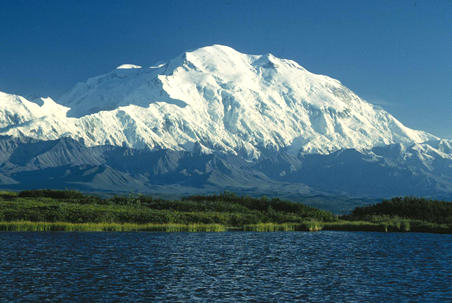

In [65]:
the_image

In [66]:
Image_arr = np.array(the_image)

In [69]:
Image_arr

array([[[  9,  72, 125],
        [  9,  72, 125],
        [  9,  72, 125],
        ...,
        [ 42, 103, 147],
        [ 42, 103, 147],
        [ 43, 104, 148]],

       [[  9,  72, 125],
        [  9,  72, 125],
        [ 10,  73, 126],
        ...,
        [ 42, 103, 147],
        [ 42, 103, 147],
        [ 43, 104, 148]],

       [[  9,  72, 125],
        [ 10,  73, 126],
        [ 10,  73, 126],
        ...,
        [ 44, 105, 150],
        [ 45, 106, 151],
        [ 45, 106, 151]],

       ...,

       [[ 21,  41,  50],
        [ 29,  51,  64],
        [ 28,  54,  69],
        ...,
        [ 27,  58,  79],
        [ 22,  53,  74],
        [ 19,  47,  69]],

       [[ 27,  51,  63],
        [ 29,  55,  68],
        [ 27,  56,  72],
        ...,
        [ 33,  70,  97],
        [ 27,  64,  91],
        [ 22,  57,  85]],

       [[ 18,  45,  56],
        [ 20,  48,  62],
        [ 21,  52,  70],
        ...,
        [ 15,  51,  77],
        [ 12,  48,  74],
        [ 11,  45,  72]]

In [71]:
the_image_2 = PIL.Image.fromarray(Image_arr)

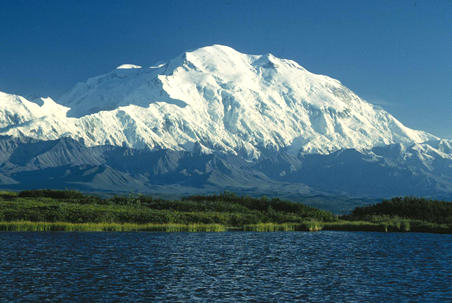

In [73]:
the_image_2

For this example, we are importing a couple of libraries first the PIL (python imagery library), the requests library for making HTTP requests in Python, and finally, the io library for input and output.

We start by getting the response from the URL given of the picture file by using the get method and store it in the_response variable.

To print the image locally, we apply the content method to the response to get the content of the response, then change it into bytes using the BytesIO method and then open it as an image file using Image.open and store it in the the_image variable.

To cast the image to an array, we use the np.array method and pass in the_image variable.

Optionally, to convert back the array to an image file, this time, we use PIL.Image.fromarray method and pass in the Image_arr variable.

### Ex 62: How to drop all missing values from a NumPy array

Q: Drop all nan values from a 1D numpy array

In [77]:
the_arr = np.array([1,2,3,np.nan,5,6,7,np.nan])
the_arr

array([ 1.,  2.,  3., nan,  5.,  6.,  7., nan])

#### Desired output

In [78]:
# array([ 1.,  2.,  3.,  5.,  6.,  7.])

#### Solution

In [80]:
the_arr[~np.isnan(the_arr)]

array([1., 2., 3., 5., 6., 7.])

np.isnan method will return a boolean array where True is the position of the nan value in the array.

To drop nan values, we are going to use the ~ operator to inverse the boolean array. This time we will get False on the position where nan is found and True on the rest of the positions. It means that if we use indexing on the original array, we will get back only values that are not nan values.

### Ex 63: How to compute the euclidean distance between two arrays

Q: Compute the Euclidean distance between two arrays a and b

In [4]:
a = np.array([1,2,3,4,5])
b = np.array([4,5,6,7,8])

#### Desire output

In [ ]:
# 6.708203932499369

#### Solution

In [11]:
euclidean_dist = np.linalg.norm(a-b,ord=2)

In [12]:
print(euclidean_dist)

6.708203932499369


Theory Behind this exercise is from [Introduction to Data Mining](https://www.amazon.com/dp/0321321367/)

![title](/blog/assets/post_cont_image/ex63.png)

This function can return one of eight different matrix norms, or one of an infinite number of vector norms (described above), depending on the value of the ord parameter.

It works because Euclidean distance is l2 norm and the value of ord parameter in numpy.linalg.norm method is 2.

### Ex 64: How to find all the local maxima (or peaks) in a 1d array

Q: Find all the peaks in a 1D NumPy array a. Peaks are points surrounded by smaller values on both sides.

In [17]:
a = np.array([1, 3, 7, 1, 2, 6, 0, 1])

#### Desire output

In [18]:
# array([2, 5])

#### Solution

In [20]:
import numpy as np
from scipy.signal import argrelextrema

maxInd = argrelextrema(a, np.greater)

In [22]:
maxInd[0]

array([2, 5])

To calculate the extrema of a NumPy array, we use the argrelextrema method (from scipy library) and pass in the array as the first argument and then as the second argument we use the np.greater function which is a function to compare the greatest number along with two elements in the array.

A tuple is returned and used [0] to get back the positions we are looking for.

### Ex 65: How to subtract a 1D array from a 2D array, where each item of 1D array subtracts from respective row

Q: Subtract the 1D array b_1d from the 2D array a_2d, such that each item (element) of b_1d subtracts from the corresponding element in a row of a_2d.

In [33]:
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])

#### Desire output

In [34]:
# [[2 2 2]
#  [2 2 2]
#  [2 2 2]]

#### Solution

In [24]:
a_2d[:,:] - b_1d[:,None]

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

We are taking each item in rows from the 2D array and subtract each item in each row by every element in the 1D array. 

So we are taking all the 3s in the first row of the 2D array and subtract them by 1 from the 1D array and the results are placed in a new array, then all the 4s are subtracted by 2 and finally all the 5s by 3.

We will be left with a 2D array only comprised by 2s.

### Ex 66: How to subtract a 1D array from a 2D array, where each item of 2D array subtracts from respective column

Q: Subtract the 1D array arr_1d from the 2D array arr_2d, such that each item (element) of arr_1d subtracts from the respective element in a column of arr_2d.

In [28]:
a_2d = np.array([[3,3,3],[4,4,4],[5,5,5]])
b_1d = np.array([1,2,3])

#### Desired output

In [ ]:
# array([[2, 1, 0],
#        [3, 2, 1],
#        [4, 3, 2]])

#### Solution

In [29]:
a_2d[:,:] - b_1d[None,:]

array([[2, 1, 0],
       [3, 2, 1],
       [4, 3, 2]])

This one is similar to the previous one, but the difference is that we are subtracting each item in the 2D array by the corresponding item in the 1D array. 

So for the first row in the 2D array, we take 3 and subtract it by 1 from the 1D array, then we take the second 3 and subtract it by 2 in the 1D array and finally we take 3 at the third position and subtract it to 3 in the 1D array. We do the same for the rest of the arrays.

### Ex 67: How to find the index of n'th repetition of an item in an array

Q: Find the index of 5th repetition of number 1 in x.

In [39]:
the_arr = np.array([1, 2, 1, 1, 3, 4, 3, 1, 1, 2, 1, 1, 2])

#### Desire output

In [6]:
# 10

#### Solution

#### 1st Method: NumPy way

In [47]:
rep_pos = np.where(the_arr==1)[0]
rep_pos[5]

10

We use the where method to get the position of all the 1s in the array by using the condition the_arr == 1. We get back a tuple that is why we used [0] to select the first argument. 

To select the 5th repetition of 1, we then use indexing on the array.

#### 2nd Method: Pythonic way

In [59]:
tuple_pos_repeated = [i for i in enumerate(the_arr) if i[1] == 1]
tuple_pos_repeated

[(0, 1), (2, 1), (3, 1), (7, 1), (8, 1), (10, 1), (11, 1)]

In [62]:
tuple_pos_repeated[5][0]

10

The second way to approach this problem is by using list comprehension. We use the for loop and enumerate function to traverse the array and then use an if statement to only extract elements equal to 1. if you want to refresh your mind about loops and list comprehension, please read more [here](https://semasuka.github.io/blog/2019/02/03/control-flow-part-2.html).

Now that we have a tuple of all the positions of number 1 in the array, we can proceed by using indexing on tuple by using[5] to get the 5th repetition of 1 and then indexing again by adding [0] to get only the position we are looking for.

### Ex 68: How to convert NumPy's datetime64 object to datetime's datetime object

Q: Convert NumPy's datetime64 object to datetime's datetime object

In [68]:
dt64 = np.datetime64('2018-02-25 22:10:10')
dt64.astype(int)

1519596610

#### Desired output

In [67]:
# datetime.datetime(2018, 2, 25, 22, 10, 10)

#### Solution

In [66]:
from datetime import datetime
datetime.utcfromtimestamp(dt64.astype(int))

datetime.datetime(2018, 2, 25, 22, 10, 10)

We first import the datetime function from the datetime module, then pass the Numpy datetime object (converted into int type) which returns the UTC datetime object. Yeah, it is that simple!

### Ex 69: How to compute the moving average of a NumPy array?

Q: Compute the moving average of window size 3, for the given a random 1D array.

In [31]:
np.random.seed(100)
oneD_arr = np.random.randint(10, size=10)
oneD_arr

array([8, 8, 3, 7, 7, 0, 4, 2, 5, 2])

#### Desire output

In [26]:
# moving average:  [ 6.33  6.    5.67  4.67  3.67  2.    3.67  3.  ]

#### Solution

In [50]:
np.set_printoptions(precision=2)
def moving_average(arr,w=3):
    accum_arr = np.cumsum(arr, dtype=float)
    accum_arr[w:] = accum_arr[w:] - accum_arr[:-w]
    return accum_arr[w-1:]/w
moving_average(oneD_arr)

array([6.33, 6.  , 5.67, 4.67, 3.67, 2.  , 3.67, 3.  ])

To calculate the moving average of a set of data at a particular window, we first create a function that takes in the array itself and then set the window w by default to 3. Then we calculate the cumulative sum of the elements in the array, which in this case will be all the elements in the row axis since we only have a 1D array.

Now comes the fun part! we subtract each element in the accum_arr starting from index 4 (which correspond to window 3 of the moving average) by each element in another accum_arr array, this time ending at the 4th last element inclusive. The result is assigned to accum_arr starting from index 4.

Finally, we take the previous array this time starting from index 3(w-1) and we divide all the elements in that array by the window 3 to finally get the moving average of window 3 of that array.

These steps above are from the formula to compute the moving average of a NumPy. Please refer [this Wikipedia page](https://en.wikipedia.org/wiki/Moving_average) for more information. Refer [to this link](https://stackoverflow.com/questions/14313510/how-to-calculate-moving-average-using-numpy) on StackOverflow where this exercise is inspired from.

### Ex 70: How to create a NumPy array sequence given only the starting point, length and the step?

Q: Create a NumPy array of length 10, starting from 5 and has a step of 3 between consecutive numbers

In [73]:
start_num = 5
step_num = 3
size_num = 10

#### Desire output

In [75]:
# array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32])

#### Solution

In [76]:
start_num = 5
step_num = 3
size_num = 10

def seq(start,step,size):
    stop = start + (size*step)
    return np.arange(start,stop,step)
seq(start_num,step_num,size_num)

array([ 5,  8, 11, 14, 17, 20, 23, 26, 29, 32])

This is an interesting exercise because we have the length of the array, the start and the step. To use the arange method on the NumPy variable, we need the start, stop and step. In this case, we are missing the stop value.
So to get the stop, we can use the size, the step and the start. 

That is what we did by creating a new function that takes as parameter the start, the step and the size. To calculate the stop, we add the start and the product of the size and the step.

Then returned the np.arange method with the start, the previously calculated stop and the step.

### Ex 71: How to fill in missing dates in an irregular series of NumPy dates?

Q: Given an array of a non-continuous sequence of dates. Make it a continuous sequence of dates, by filling in the missing dates.

In [52]:
dates = np.arange(np.datetime64('2018-02-01'), np.datetime64('2018-02-25'), 2)
dates

array(['2018-02-01', '2018-02-03', '2018-02-05', '2018-02-07',
       '2018-02-09', '2018-02-11', '2018-02-13', '2018-02-15',
       '2018-02-17', '2018-02-19', '2018-02-21', '2018-02-23'],
      dtype='datetime64[D]')

#### Desire output

In [ ]:
# array(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
#        '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
#        '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12',
#        '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16',
#        '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20',
#        '2018-02-21', '2018-02-22', '2018-02-23'], dtype='datetime64[D]')

#### Solution

#### 1st Method: using list comprehension

In [90]:
cont_no_last_date = np.array([np.arange(date,(date+d)) for date,d in zip(dates, np.diff(dates))]).reshape(-1)

In [93]:
cont_with_last_date = np.hstack((cont_no_last_date,dates[-1]))
cont_with_last_date

array(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
       '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
       '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12',
       '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16',
       '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20',
       '2018-02-21', '2018-02-22', '2018-02-23'], dtype='datetime64[D]')

One of the ways to go about solving this issue is to use the list comprehension, we first loop through each date and the difference between those dates d (which is 2) and create a NumPy range starting from the date to a new date found using date + d and place those dates in an array. we end up with a continuous range of dates from '2018-02-01' to '2018-02-22' (notice how it is not '2018-02-23') and reshape it using -1 which means that it is an unknown dimension and we want NumPy to figure out the correct dimension to use.

Now we need to add the last date by stacking it horizontally (column-wise) using the hstack function to cont_no_last_date and pass in the last date using indexing -1. 

#### 2nd Method: using for loop

In [115]:
cont_no_last_date = []
for date,d in zip(dates, np.diff(dates)):
    cont_no_last_date.append(np.arange(date,date+d))
cont_no_last_date = np.array(cont_no_last_date).reshape(-1)

In [114]:
cont_with_last_date = np.hstack((cont_no_last_date,dates[-1]))
cont_with_last_date

array(['2018-02-01', '2018-02-02', '2018-02-03', '2018-02-04',
       '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
       '2018-02-09', '2018-02-10', '2018-02-11', '2018-02-12',
       '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16',
       '2018-02-17', '2018-02-18', '2018-02-19', '2018-02-20',
       '2018-02-21', '2018-02-22', '2018-02-23'], dtype='datetime64[D]')

The second way to approach this problem is by using the for loop statement. we first create an empty list and then loop through the dates and d value from zip method of the dates and the difference between the dates. Then inside the loop, we append the rage from the date to the date + d just as we did for the list comprehension.

After the loop, we cast the list to an array, reshape and assign it to the cont_no_last_date value. Then we add the last date just as we did for the list comprehension method.

### Ex 72: How to create strides from a given 1D array?

Q: From the given 1D array arr, generate a 2D matrix using strides, with a window length of 4 and strides of 2, like [[0,1,2,3], [2,3,4,5], [4,5,6,7]..]

In [116]:
arr = np.arange(15) 
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

#### Desire output

In [117]:
# [[ 0  1  2  3]
#  [ 2  3  4  5]
#  [ 4  5  6  7]
#  [ 6  7  8  9]
#  [ 8  9 10 11]
#  [10 11 12 13]]

#### Solution

In [132]:
def gen_strides(arr, stride_len=2, window_len=4):
    n_strides = ((arr.size - window_len)//stride_len) + 1
    # n_strides = 6
    print(stride_len)
    return np.array([arr[s:(s+window_len)] for s in np.arange(0,n_strides*stride_len,stride_len)])
gen_strides(arr)

2


array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

We first create a function that takes in the array, set the stride length to 2 and then window length to 4. Then we calculate the n_strides value by subtracting the array size to window_len and then dividing it (using floor division or integer division) by stride_len and adding 1 to it.

Finally, we create a list comprehension that goes through a range from 0 to 12 (n_strides * stride_len) by stepping by 2 using s value which corresponds to the 6 lists that we are creating. We use indexing on the arr with the starting position s and the last element s + window_len in each of the 6 lists. At last, we place the 6 strides lists in an array.

### Conclusion

There you go! 72 exercise on NumPy to solidify your understanding of NumPy. I can guaranty that if you completed all these exercises you are more than ready to start using NumPy in an end-to-end Machine Learning project.

The next post will be an introduction to one of my favorite Machine learning libraries, pandas Library for tabular data manipulation. Stay tuned and don't forget to subscribe to get notified for the next post.

Thank you again for doing these exercises with me. I hope you have learned one or two things. If you like this post, please subscribe to stay updated with new posts, and if you have a thought or a question, I would love to hear it by commenting below. Cheers, and keep on learning!